In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [3]:
filname = 'fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df2=pd.read_csv('fer2013.csv',names=names, na_filter=False)
im=df2['pixels']


In [4]:
def getData(filname):
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [5]:
#nb de classe
X, Y = getData(filname)
num_class = len(set(Y))

In [6]:
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [8]:
from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , Adam
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [9]:
def my_model():
    
    input_shape = (48,48,1)
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(1,48,48)))
    model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
    model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
    model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
    model.add(Conv2D(96, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
    model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
    model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(7 , activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam' ,
              metrics=['accuracy'])
    return model
model=my_model()
model.summary()

c:\users\corin\appdata\local\continuum\miniconda3\envs\tf2gpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  import sys
c:\users\corin\appdata\local\continuum\miniconda3\envs\tf2gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  # Remove the CWD from sys.path while we load stuff.
c:\users\corin\appdata\local\continuum\miniconda3\envs\tf2gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  del sys.path[0]
c:\users\corin\appdata\local\continuum\miniconda3\envs\tf2gpu\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 48, 32)         13856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 48, 32)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 24, 16)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 24, 64)         9280      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 24, 64)         36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 12, 32)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 12, 96)        

In [10]:
path_model='model_filter.h5' 
K.tensorflow_backend.clear_session() 
model=my_model() 


c:\users\corin\appdata\local\continuum\miniconda3\envs\tf2gpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  import sys
c:\users\corin\appdata\local\continuum\miniconda3\envs\tf2gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  # Remove the CWD from sys.path while we load stuff.
c:\users\corin\appdata\local\continuum\miniconda3\envs\tf2gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  del sys.path[0]
c:\users\corin\appdata\local\continuum\miniconda3\envs\tf2gpu\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format

In [26]:
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=1, 
            verbose=1, 
            validation_data=(X_test,y_test))

ValueError: Error when checking input: expected conv2d_1_input to have shape (1, 48, 48) but got array with shape (48, 48, 1)

In [11]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [12]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

In [13]:
y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape

(3589, 7)

c:\users\corin\appdata\local\continuum\miniconda3\envs\tf2gpu\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


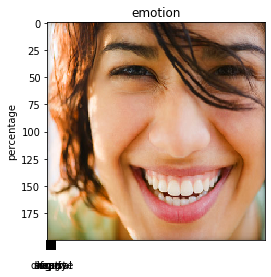

Expression Prediction: happy


In [14]:
from skimage import io
img = image.load_img('smile2.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('smile2.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

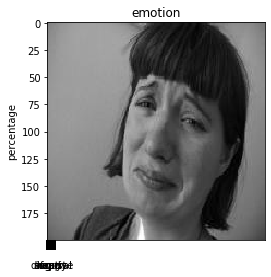

Expression Prediction: sad


In [15]:
from skimage import io
img = image.load_img('sad2.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('sad2.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255  

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])